# Pymaceuticals Inc.
---

### Analysis

- Observation 1: From the summary statistics, we can see that Capomulin and Ramicane have lower standard deviations than the rest of the drugs being studied. This means that mice on these drugs are going to have slightly more similar tumor volumes, concentrated around their respective means of 40.67 and 40.22. Looking at the difference between the median and mean, these two drugs have more similar values for these two statistics than some other drugs. 
- Observation 2: In terms of our sample, we know there are 248 total mice testing 10 different drugs. From the bar chart, Capomulin and Ramicane have the largest number of timepoints tracked, and Propriva has the smallest. The pie chart also shows that the sample is majority male, with 51% of the mice being male.
- Observation 3: The r^2 value of .71 indicates a slight positive correlation between the weight of the mouse and the average tumor volume, since a value of 1 would mean there was a perfect positive relationship. This is also shown in the graph, since the scatter points are showing the general positive slope, but they are not perfectly clustered around the regression line. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = pd.merge(mouse_metadata, study_results, on='Mouse ID',how='outer')

# Display the data table for preview
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice = data['Mouse ID'].unique()
len(unique_mice)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = data[data.duplicated(subset=['Mouse ID','Timepoint'],keep=False)==True]
duplicate_mouse['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# all data for Mouse g989
data.loc[data['Mouse ID']=='g989']
# all data when Mouse ID & Timepoint are duplicates
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data.loc[data['Mouse ID']!='g989']
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stdev = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

sum_stats = pd.DataFrame({
    'Mean Tumor Volume':mean,
    'Median Tumor Volume':median,
    'Tumor Volume Variance':variance,
    'Tumor Volume Std. Dev':stdev,
    'Tumor Volume Std. Err.':sem
})
sum_stats


/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_79458/3572734088.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_79458/3572734088.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_79458/3572734088.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will d

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

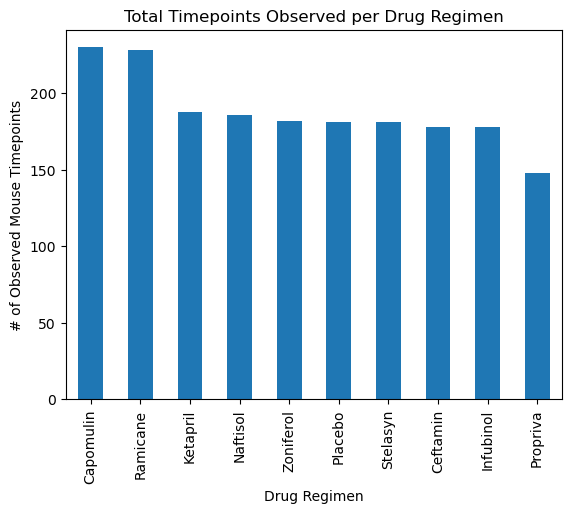

In [9]:
# Prepare dataframe with values equaling the counts of observations, Drug Regimen as index
grouped_pdbar = clean_data[['Drug Regimen', 'Mouse ID']].groupby('Drug Regimen').count()
grouped_pdbar = grouped_pdbar.sort_values('Mouse ID', ascending=False)

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_pdbar['Mouse ID'].plot(kind='bar')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Timepoints Observed per Drug Regimen')
plt.show()

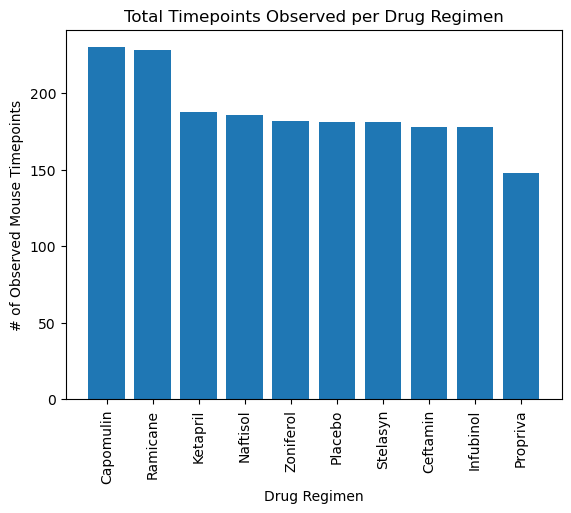

In [10]:
# reset index to call Drug Regimen as a column
grouped_pybar = grouped_pdbar.reset_index()

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xaxis = np.arange(len(grouped_pybar['Mouse ID']))
labels = clean_data['Drug Regimen'].unique()
ticks = [value for value in xaxis]
plt.bar(xaxis,grouped_pybar['Mouse ID'])
plt.xticks(ticks, grouped_pybar['Drug Regimen'], rotation="vertical")
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.title('Total Timepoints Observed per Drug Regimen')
plt.show()

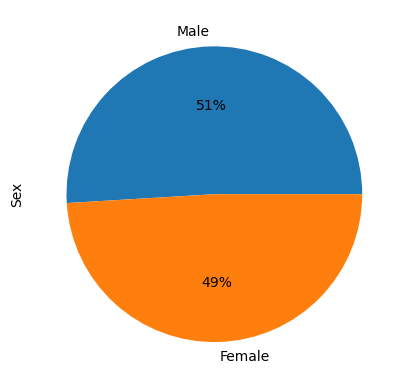

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
grouped_pdpie = clean_data[['Sex','Mouse ID']].groupby('Sex').count().sort_values('Sex', ascending=False)
grouped_pdpie.plot(kind='pie',y='Mouse ID', autopct='%1.0f%%',legend=False)
plt.ylabel('Sex')
plt.show()

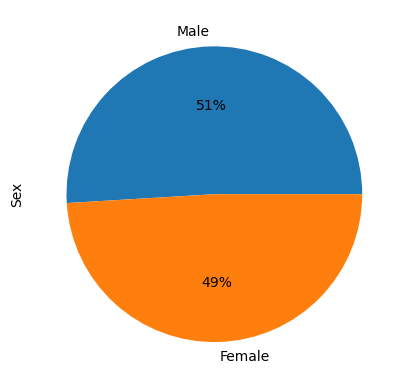

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
grouped_pypie = grouped_pdpie.reset_index()
plt.pie(grouped_pypie['Mouse ID'],labels=grouped_pypie['Sex'],autopct='%1.0f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
timepoint_max = timepoint_max.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data_merged = timepoint_max.merge(clean_data, on=['Mouse ID','Timepoint'],how='left')
data_merged


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    loop = data_merged.loc[data_merged['Drug Regimen']== treatment]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(loop['Tumor Volume (mm3)'])
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    quartiles = loop['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    outliers = loop['Tumor Volume (mm3)'].loc[(loop['Tumor Volume (mm3)']>upperq+(1.5*iqr))|
                                              (loop['Tumor Volume (mm3)']<lowerq-(1.5*iqr))]
    
    print(f"{treatment}\'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


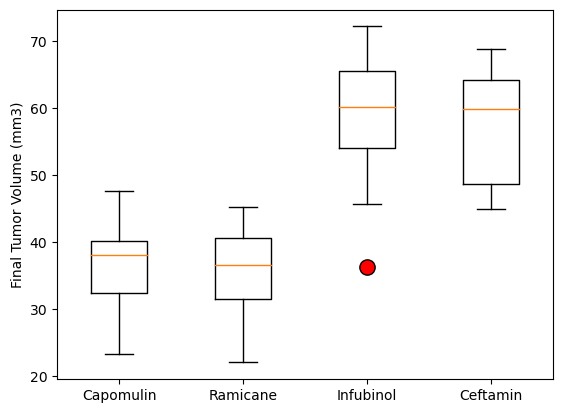

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, flierprops = dict(marker = "o", markerfacecolor = "red", markersize = 11))
ax1.set_xticklabels(treatments)

plt.show()

## Line and Scatter Plots

In [22]:
# Preparing dataframe for one mouse
single_mouse = clean_data.loc[clean_data['Mouse ID']=='l509']
single_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


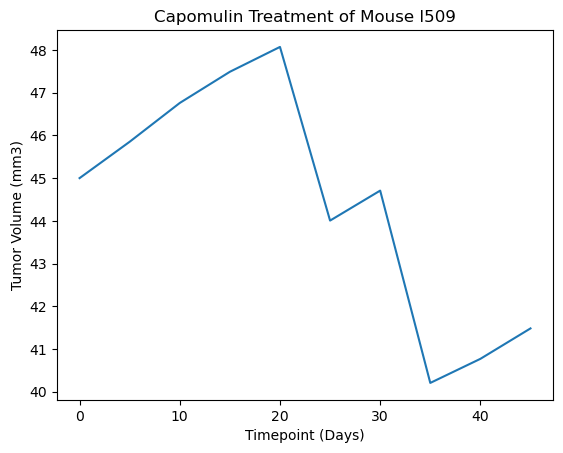

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(single_mouse['Timepoint'],single_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')
plt.show()

/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_79458/3997038663.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  [clean_data['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean().reset_index()


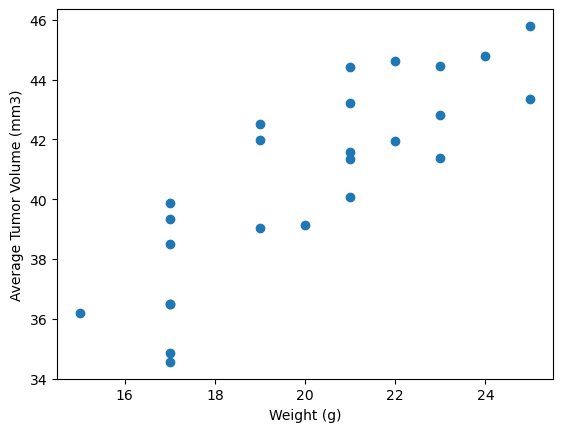

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_data[['Drug Regimen','Weight (g)','Tumor Volume (mm3)','Mouse ID']].loc\
[clean_data['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean().reset_index()
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin['Weight (g)'], capomulin['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.71


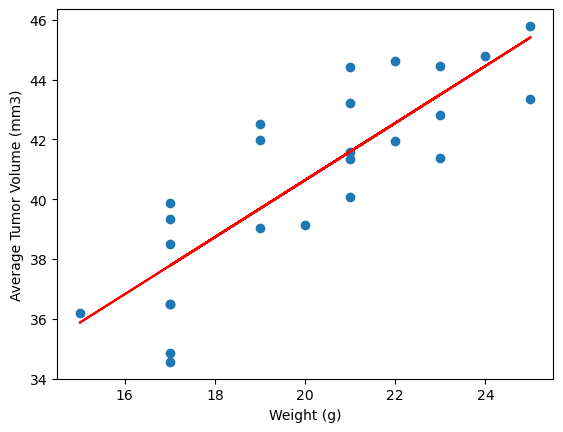

In [26]:
# Calculate the correlation coefficient and a linear regression model 
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
# unpack values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue**2,2)}")
# write line equation
regress_values = x_values * slope + intercept

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()
